In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import bootstrap_plot
import scipy

%matplotlib notebook

In [6]:
dfabstract = pd.read_csv('../GERabstract.csv')
dfdetailed = pd.read_csv('../GERdetailed.csv')

# Replacement of strings of the system related questions on both surveys
dfabstr = dfabstract.replace('Your thoughts about the system [','').replace('Neutral', 2).replace('I do agree',3).replace('I don\'t agree at all',0).replace('I don\'t agree', 1).replace('I gree entirelly', 4).replace('meetings per week','', regex=True).replace('meetings', '', regex=True).replace('Your thoughts about the system \[','').replace(']','')
dfdetail = dfdetailed.replace('Your thoughts about the system [','').replace('Neutral', 2).replace('I do agree',3).replace('I don\'t agree at all',0).replace('I don\'t agree', 1).replace('I gree entirelly', 4).replace('meetings per week','', regex=True).replace('meetings', '', regex=True).replace('Your thoughts about the system \[','').replace(']','')

dfabstRenamed = dfabstr.columns = ['time', 'age', 'sex', 'ethnicity', 'weekly_online_meet', 'others_opinion', 'sys_too_complex', 'system_understood', 'use_daily', 'raise_engagement', 'raise_happiness', 'size_change_understood', 'complexity_of_sys', 'effect_of_slider', 'use_makes_happy', 'irritating', 'nice_interface', 'system_felt_valuable', 'suggestions']
dfdetRenamed = dfdetail.columns = ['time', 'age', 'sex', 'ethnicity', 'weekly_online_meet', 'others_opinion', 'sys_too_complex', 'system_understood', 'use_daily', 'raise_engagement', 'raise_happiness', 'size_change_understood', 'complexity_of_sys', 'effect_of_slider', 'use_makes_happy', 'irritating', 'nice_interface', 'system_felt_valuable', 'suggestions']

In [5]:
dfdetailed.head
dfabstract.head

<bound method NDFrame.head of                    Zeitstempel How old are you? What is your sex?  \
0    2021/07/12 4:42:28 PM OEZ      20-29 years              Male   
1    2021/07/12 7:27:24 PM OEZ      20-29 years              Male   
2    2021/07/12 8:35:25 PM OEZ      20-29 years              Male   
3    2021/07/14 1:08:01 PM OEZ      20-29 years            Female   
4    2021/07/15 3:54:26 PM OEZ      20-29 years              Male   
5    2021/07/18 9:35:30 PM OEZ      30-39 years              Male   
6    2021/07/19 9:31:42 PM OEZ      30-39 years              Male   
7   2021/07/19 11:10:44 PM OEZ       > 60 years            Female   
8    2021/07/21 1:18:54 PM OEZ      20-29 years            Female   
9   2021/07/22 11:38:16 AM OEZ      20-29 years              Male   
10   2021/07/22 1:57:41 PM OEZ      30-39 years              Male   
11   2021/08/01 3:05:25 PM OEZ      30-39 years            Female   

   Where are you born? How many online meetings per week do you usually 

<IPython.core.display.Javascript object>


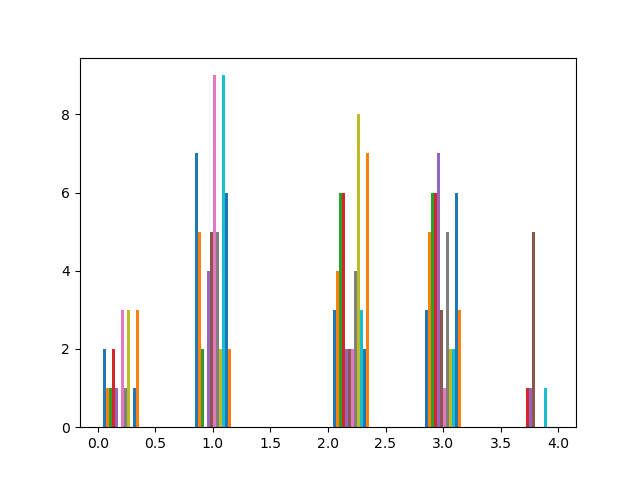

In [42]:
# questions related to the system
sys_dfabstr = dfabstr.iloc[:,6:-1]
sys_dfdetail = dfdetail.iloc[:,6:-1]
# dataframe['column'].plot()
#print(cop)
#plt.hist(sys_dfabstr)
plt.hist(sys_dfdetail)
plt.show()

In [7]:
dfabstr.head

<bound method NDFrame.head of                           time          age     sex ethnicity  \
0    2021/07/12 4:42:28 PM OEZ  20-29 years    Male    Europa   
1    2021/07/12 7:27:24 PM OEZ  20-29 years    Male    Europa   
2    2021/07/12 8:35:25 PM OEZ  20-29 years    Male    Europa   
3    2021/07/14 1:08:01 PM OEZ  20-29 years  Female    Europa   
4    2021/07/15 3:54:26 PM OEZ  20-29 years    Male      Asia   
5    2021/07/18 9:35:30 PM OEZ  30-39 years    Male      Asia   
6    2021/07/19 9:31:42 PM OEZ  30-39 years    Male      Asia   
7   2021/07/19 11:10:44 PM OEZ   > 60 years  Female    Africa   
8    2021/07/21 1:18:54 PM OEZ  20-29 years  Female      Asia   
9   2021/07/22 11:38:16 AM OEZ  20-29 years    Male    Africa   
10   2021/07/22 1:57:41 PM OEZ  30-39 years    Male    Europa   
11   2021/08/01 3:05:25 PM OEZ  30-39 years  Female      Asia   

   weekly_online_meet others_opinion  sys_too_complex  system_understood  \
0              3 - 6              no            

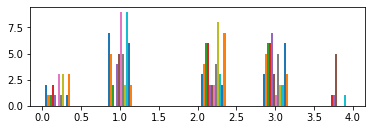

In [9]:
plt.subplot(1,2,1)
plt.hist(sys_dfabstr)
plt.subplot(2,1,1)
plt.hist(sys_dfdetail)
plt.show()

- with share**y** the y-Axes are share by both of the graphs

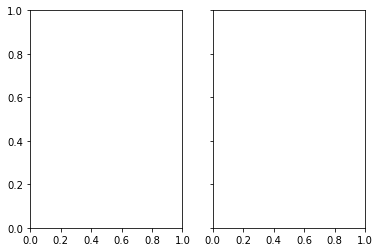

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True)

Here axes is an array which holds the different subplot axes, and you can access one just by indexing axes.
If you want a shared x-axis, then you can provide sharex=True to plt.subplots

<IPython.core.display.Javascript object>


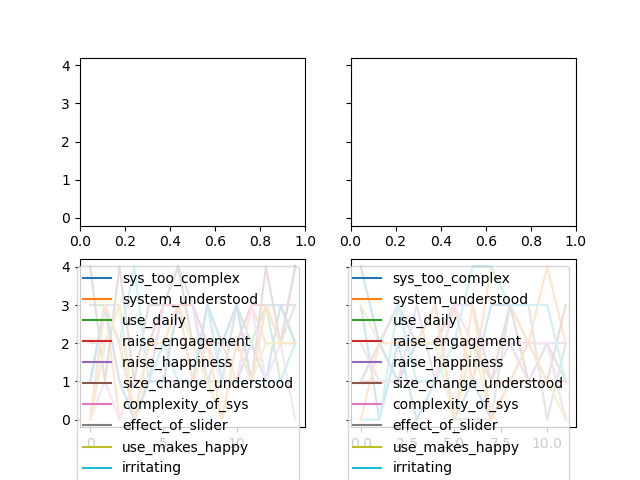

<AxesSubplot:>

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True)

sys_dfabstr.plot(ax=axes[1,1])
sys_dfdetail.plot(ax=axes[1,0])

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

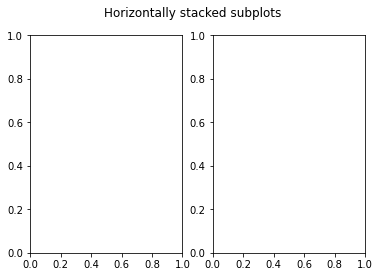

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
sys_dfabstr.plot(sys_dfdetail, sys_dfabstr)
sys_dfdetail.plot(sys_dfabstr, sys_dfdetail)

# Qita shikoje edhe 1 here bash modelat statistik nese sprish pun xog


<IPython.core.display.Javascript object>


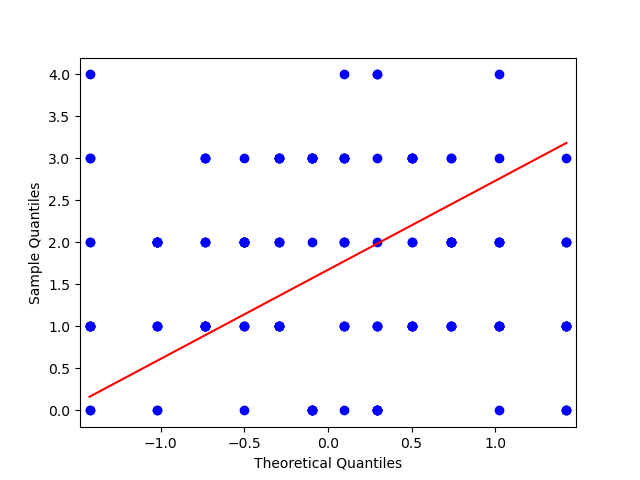

In [44]:
from statsmodels.graphics.gofplots import qqplot
qqplot(sys_dfabstr, line='s')
plt.show()

Are the given data looking gausian or not

In [45]:
from scipy.stats import shapiro
stat, p = shapiro(sys_dfabstr)
print('Statistics:%.3f, p=%.3f' % (stat,p))
#interpretuesi
alpha = 0.05
if p > alpha:
    print('Sample does look gausian')
else:
    print('Sample doesn\'t look gausian')

Statistics:0.906, p=0.000
Sample doesn't look gausian


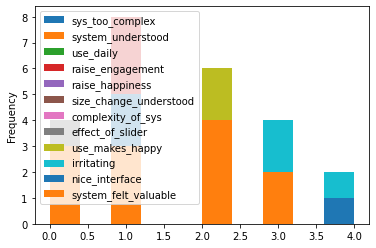

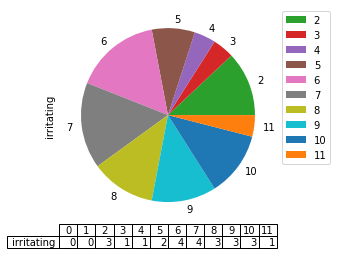

In [16]:
sys_dfabstr.plot.hist(bins=10)
#sys_dfabstr.plot.area()
#sys_dfabstr.plot.pie(subplots=True)
#sys_dfabstr.plot.pie(y='irritating')
sys_dfabstr.plot.pie(y='irritating',x='nice_interface', table=True)
plt.legend(bbox_to_anchor=(1,1), loc="best")
plt.show()

- on the x=complexity_of_system(3)
- on the y=raise_engagement(6)

<AxesSubplot:xlabel='raise_engagement', ylabel='complexity_of_sys'>

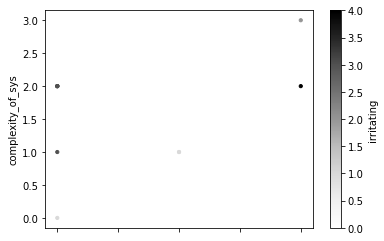

In [30]:
#sys_dfabstr.plot.box(rot=90)
sys_dfabstr.plot.scatter(x=3,y=6, s=10, c=9)

# Density Check

best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
   

<IPython.core.display.Javascript object>


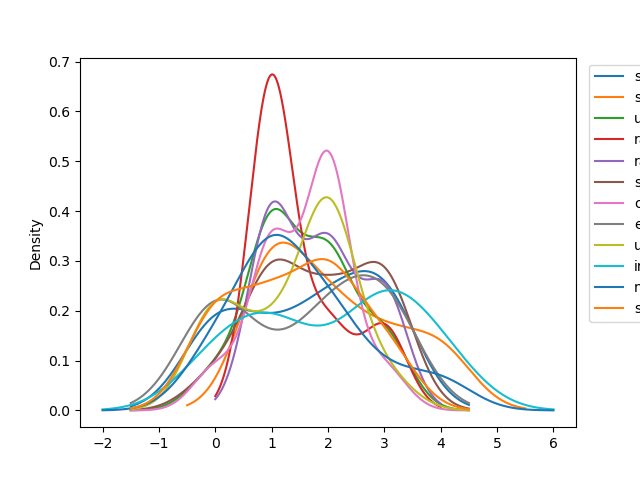

In [40]:
sys_dfabstr.plot.kde(bw_method=.5)
#concerning the legend an its position
plt.legend(bbox_to_anchor=(1.25,1), loc="upper center")
plt.show()

<IPython.core.display.Javascript object>


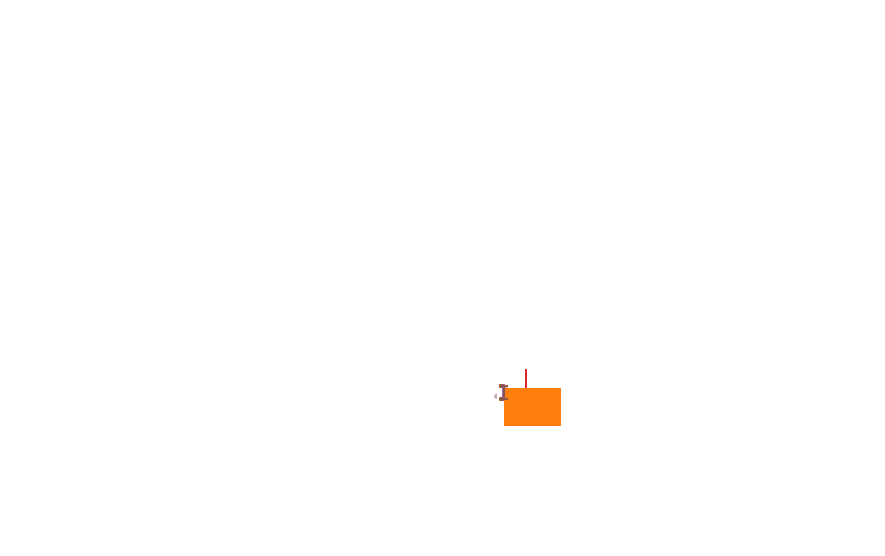

<IPython.core.display.Javascript object>


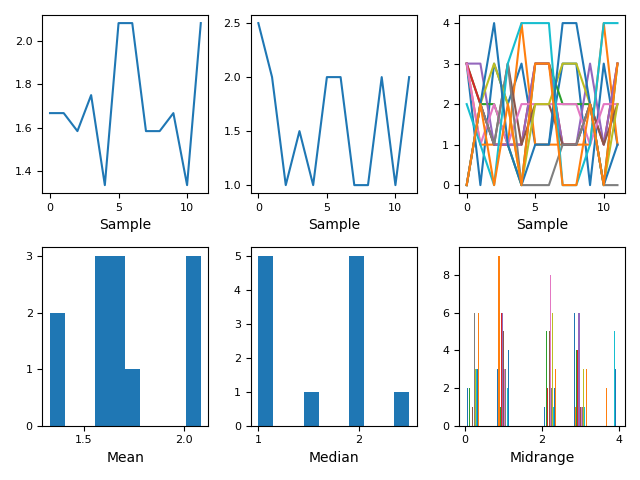

In [53]:
bootstrap_plot(sys_dfabstr, size=1, samples=12, label="ABSTRAKT");
bootstrap_plot(sys_dfabstr, size=1, samples=12, label="KONKRET");

In [80]:
sumAbs = sys_dfabstr.mean()
sumDet = sys_dfdetail.mean()
print("Median detailed emojis ")
print(sumDet)
print("%t Median abstract emojis")
print(sumAbs)

Median detailed emojis 
sys_too_complex           1.466667
system_understood         1.866667
use_daily                 2.133333
raise_engagement          2.266667
raise_happiness           2.200000
size_change_understood    2.533333
complexity_of_sys         1.066667
effect_of_slider          1.866667
use_makes_happy           1.600000
irritating                1.666667
nice_interface            1.866667
system_felt_valuable      1.666667
dtype: float64
%t Median abstract emojis
sys_too_complex           1.666667
system_understood         2.083333
use_daily                 1.583333
raise_engagement          1.500000
raise_happiness           1.833333
size_change_understood    1.833333
complexity_of_sys         1.583333
effect_of_slider          1.583333
use_makes_happy           1.416667
irritating                2.083333
nice_interface            1.500000
system_felt_valuable      1.416667
dtype: float64


Print both dataframes side by side

In [85]:
pd.concat([d.reset_index(drop=True) 
           for d in [sys_dfabstr, sys_dfdetail]], axis=1)

,sys_too_complex,system_understood,use_daily,raise_engagement,raise_happiness,size_change_understood,complexity_of_sys,effect_of_slider,use_makes_happy,irritating,...,use_daily,raise_engagement,raise_happiness,size_change_understood,complexity_of_sys,effect_of_slider,use_makes_happy,irritating,nice_interface,system_felt_valuable
0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0,...,3,0,1,4,0,2,0,1,1,0
1,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,3,2,3,1,1,2,2,3,3,3
2,2.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,3.0,...,2,3,3,4,0,3,3,2,1,2
3,0.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,1.0,...,0,0,0,1,1,0,0,4,0,0
4,1.0,1.0,2.0,2.0,1.0,3.0,1.0,3.0,2.0,1.0,...,2,2,1,3,1,1,2,1,1,2
5,3.0,3.0,3.0,3.0,3.0,0.0,3.0,0.0,0.0,2.0,...,2,3,3,3,1,1,2,2,1,2
6,1.0,1.0,3.0,3.0,3.0,2.0,2.0,0.0,2.0,4.0,...,3,3,4,4,1,3,3,1,3,3
7,3.0,4.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,4.0,...,3,3,3,2,1,2,2,1,1,1
8,3.0,3.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,3.0,...,1,2,1,1,2,1,1,3,3,2
9,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,...,2,2,2,1,1,1,0,1,2,0


Wanted here to compare the answers of both grups to the same questions

In [86]:
pd.concat([sys_dfdetail, sys_dfabstr],keys=['trail1','trail2'])

sys_too_complex  system_understood  use_daily  raise_engagement  \
trail1 0                 0                  1          3                 0   
       1                 3                  3          3                 2   
       2                 2                  0          2                 3   
       3                 0                  1          0                 0   
       4                 1                  1          2                 2   
       5                 1                  3          2                 3   
       6                 1                  3          3                 3   
       7                 1                  1          3                 3   
       8                 3                  3          1                 2   
       9                 1                  2          2                 2   
       10                1                  1          3                 2   
       11                2                  3          2                 3   
       12                1                  2          3                 3   
       13                3                  2          1                 2   
       14                2                  2          2                 4   
trail2 0                 3                  1          2                 1   
       1                 0                  2          1                 1   
       2                 2                  1          1                 1   
       3                 0                  1          2                 2   
       4                 1                  1          2                 2   
       5                 3                  3          3                 3   
       6                 1                  1          3                 3   
       7                 3                  4          0                 1   
       8                 3                  3          1                 1   
       9                 2                  2          1                 1   
       10                2                  4          2                 1   
       11                0                  2          1                 1   

           raise_happiness  size_change_understood  complexity_of_sys  \
trail1 0                 1                       4                  0   
       1                 3                       1                  1   
       2                 3                       4                  0   
       3                 0                       1                  1   
       4                 1                       3                  1   
       5                 3                       3                  1   
       6                 4                       4                  1   
       7                 3                       2                  1   
       8                 1                       1                  2   
       9                 2                       1                  1   
       10                2                       3                  1   
       11                1                       1                  3   
       12                3                       4                  1   
       13                3                       2                  2   
       14                3                       4                  0   
trail2 0                 1                       1                  2   
       1                 2                       2                  1   
       2                 1                       3                  1   
       3                 3                       2                  1   
       4                 1                       3                  1   
       5                 3                       0                  3   
       6                 3                       2                  2   
       7                 1                       1                  2   
       8                 2                       3                  2   
 

<IPython.core.display.Javascript object>


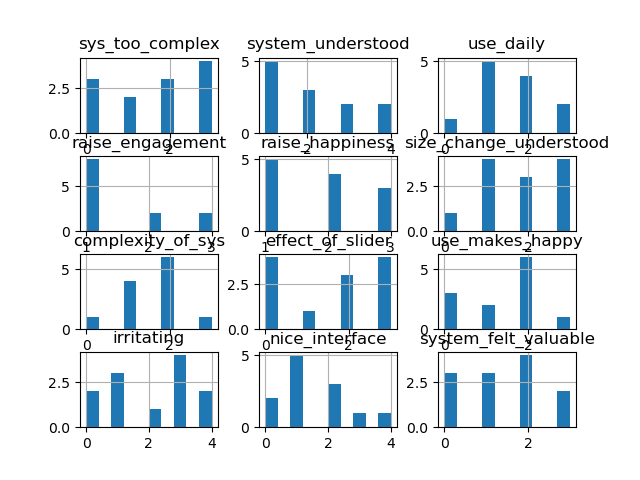

array([[<AxesSubplot:title={'center':'sys_too_complex'}>,
        <AxesSubplot:title={'center':'system_understood'}>,
        <AxesSubplot:title={'center':'use_daily'}>],
       [<AxesSubplot:title={'center':'raise_engagement'}>,
        <AxesSubplot:title={'center':'raise_happiness'}>,
        <AxesSubplot:title={'center':'size_change_understood'}>],
       [<AxesSubplot:title={'center':'complexity_of_sys'}>,
        <AxesSubplot:title={'center':'effect_of_slider'}>,
        <AxesSubplot:title={'center':'use_makes_happy'}>],
       [<AxesSubplot:title={'center':'irritating'}>,
        <AxesSubplot:title={'center':'nice_interface'}>,
        <AxesSubplot:title={'center':'system_felt_valuable'}>]],
      dtype=object)

In [87]:
#https://stackoverflow.com/questions/31258134/how-to-plot-two-dataframe-on-same-graph-for-comparison
df1 = pd.DataFrame(sys_dfabstr)
df2 = pd.DataFrame(sys_dfdetail)
df1.hist()

Creating plots of each column

<IPython.core.display.Javascript object>


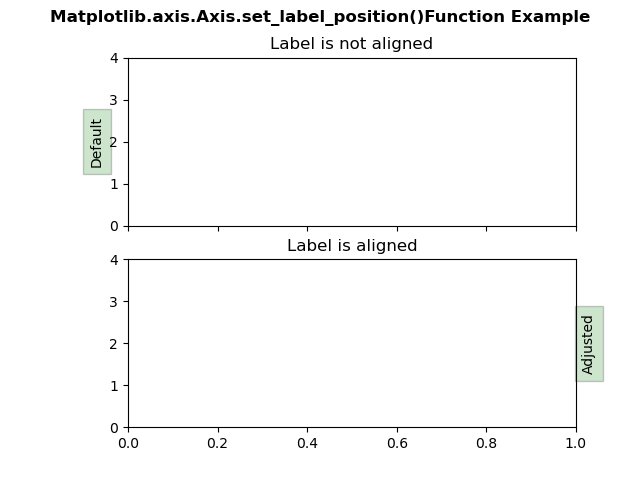

In [88]:
fig, (sys_dfabstr, sys_dfdetail) = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(left=0.2, wspace=0.6)
box = dict(facecolor='green', pad=5, alpha=0.2)
   
#np.random.seed(19680801)
#ax1.plot(2*np.random.rand(10))
sys_dfabstr.set_title('Label is not aligned')
sys_dfabstr.set_ylabel('Default', bbox=box)
sys_dfabstr.set_ylim(0, 4)
   
sys_dfdetail.set_title('\nLabel is aligned')
#ax2.plot(20*np.random.rand(10))
sys_dfdetail.set_ylabel('Adjusted', bbox=box)
sys_dfdetail.set_ylim(0, 4)
sys_dfdetail.yaxis.set_label_position("right")
   
fig.suptitle("Matplotlib.axis.Axis.set_label_position()\
Function Example", fontsize = 12, fontweight ='bold')
  
plt.show()